# Real Estate Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('data_folder/kc_house_data.csv', index_col = 0)
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [3]:
data.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [4]:
data['yr_renovated'] = data["yr_renovated"].fillna(0)

In [5]:
data.drop(['waterfront','view', 'sqft_above', 'zipcode'], axis=1, inplace=True)

In [6]:
data['date'] = pd.to_datetime(data['date'])
data['month']= data['date'].dt.month
data = data.assign(season=lambda x: x["date"].apply(lambda s: ["winter","spring","summer","fall"][(s.month-1)//3]))
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,season
id,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,0.0,1955,0.0,47.5112,-122.257,1340,5650,10,fall
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,400.0,1951,1991.0,47.7210,-122.319,1690,7639,12,fall
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,0.0,1933,0.0,47.7379,-122.233,2720,8062,2,winter
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,910.0,1965,0.0,47.5208,-122.393,1360,5000,12,fall
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,0.0,1987,0.0,47.6168,-122.045,1800,7503,2,winter


In [7]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month',
       'season'],
      dtype='object')

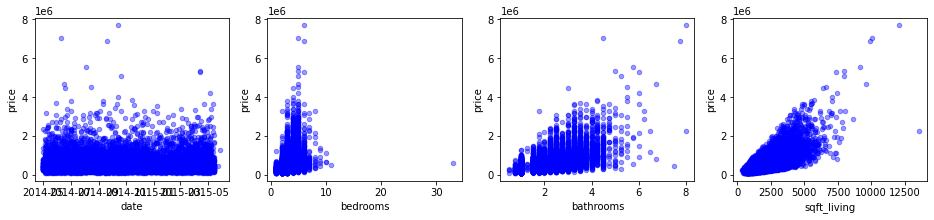

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['date', 'bedrooms', 'bathrooms', 'sqft_living'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

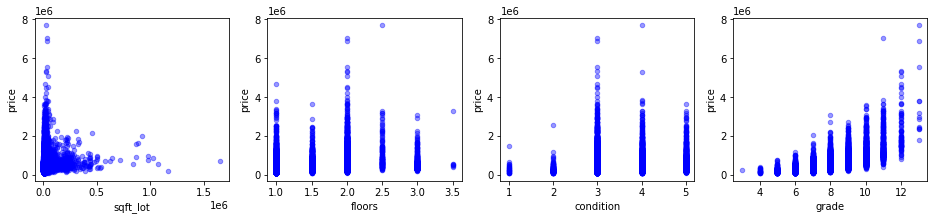

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_lot','floors', 'condition', 'grade'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

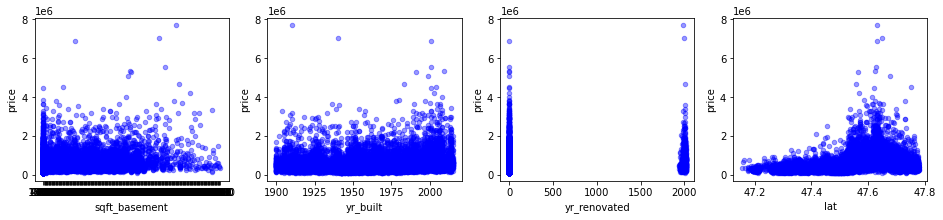

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month',
       'season'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

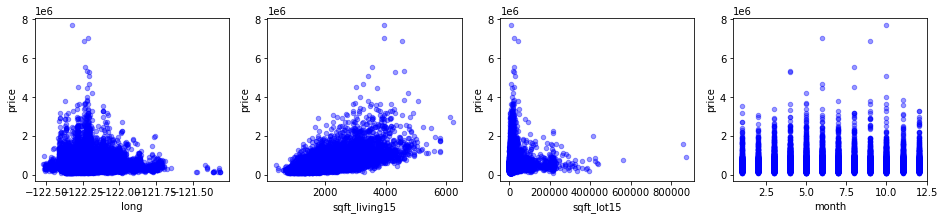

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['long', 'sqft_living15', 'sqft_lot15', 'month',
       'season'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

<AxesSubplot:xlabel='season', ylabel='Count'>

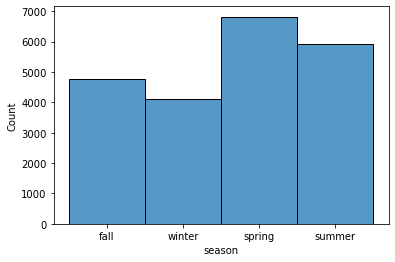

In [12]:
sns.histplot(data=data['season'])

In [13]:
#pd.plotting.scatter_matrix(data,figsize  = [20, 20]);
#plt.show()

In [14]:
data1 = data[~data['sqft_basement'].isin(['?'])]
data1.shape

(21143, 18)

In [15]:
data1['sqft_basement']=data1['sqft_basement'].astype(float)

<ipython-input-15-93e62696fa49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['sqft_basement']=data1['sqft_basement'].astype(float)


In [16]:
data1['is_renovated']= np.where(data1['yr_renovated']!= 0, True, False)
data1.head()

<ipython-input-16-2f140ff5c7c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['is_renovated']= np.where(data1['yr_renovated']!= 0, True, False)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,season,is_renovated
id,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,0.0,1955,0.0,47.5112,-122.257,1340,5650,10,fall,False
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,400.0,1951,1991.0,47.7210,-122.319,1690,7639,12,fall,True
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,0.0,1933,0.0,47.7379,-122.233,2720,8062,2,winter,False
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,910.0,1965,0.0,47.5208,-122.393,1360,5000,12,fall,False
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,0.0,1987,0.0,47.6168,-122.045,1800,7503,2,winter,False


In [17]:
data1['has_basement']= np.where(data1['sqft_basement']!= 0, True, False)
data1.head()

<ipython-input-17-4f566f017698>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['has_basement']= np.where(data1['sqft_basement']!= 0, True, False)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,season,is_renovated,has_basement
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,0.0,1955,0.0,47.5112,-122.257,1340,5650,10,fall,False,False
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,400.0,1951,1991.0,47.7210,-122.319,1690,7639,12,fall,True,True
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,0.0,1933,0.0,47.7379,-122.233,2720,8062,2,winter,False,False
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,910.0,1965,0.0,47.5208,-122.393,1360,5000,12,fall,False,True
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,0.0,1987,0.0,47.6168,-122.045,1800,7503,2,winter,False,False


In [18]:
discrete_features = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'is_renovated','season','month', 'has_basement']

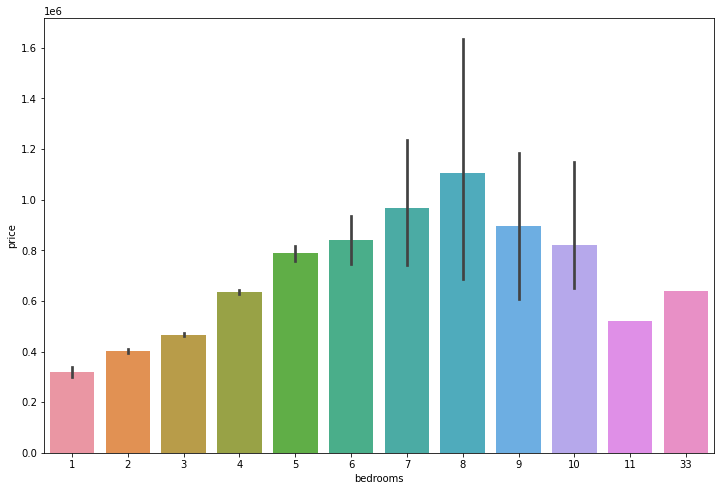

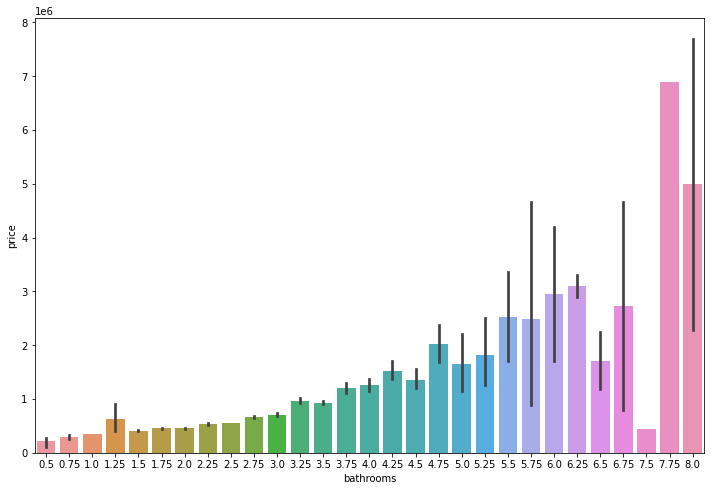

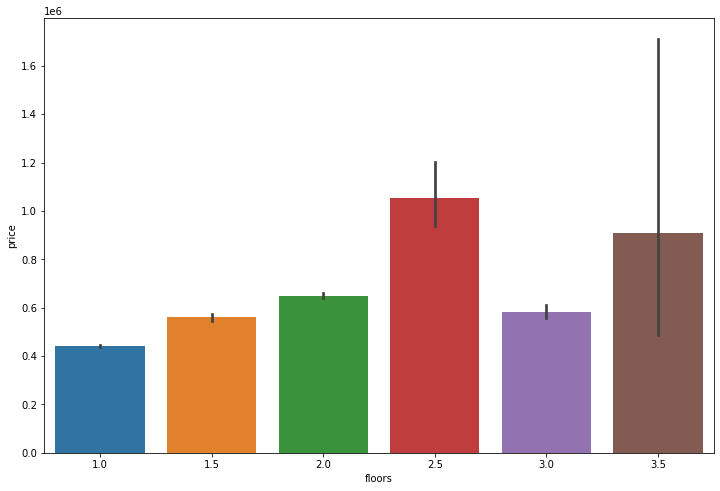

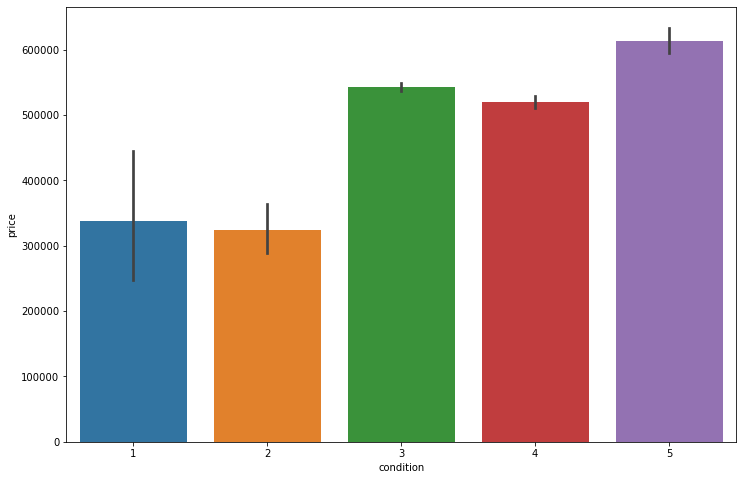

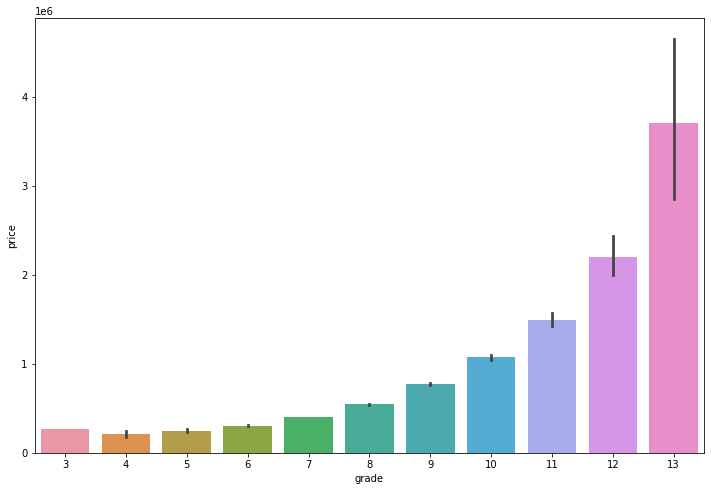

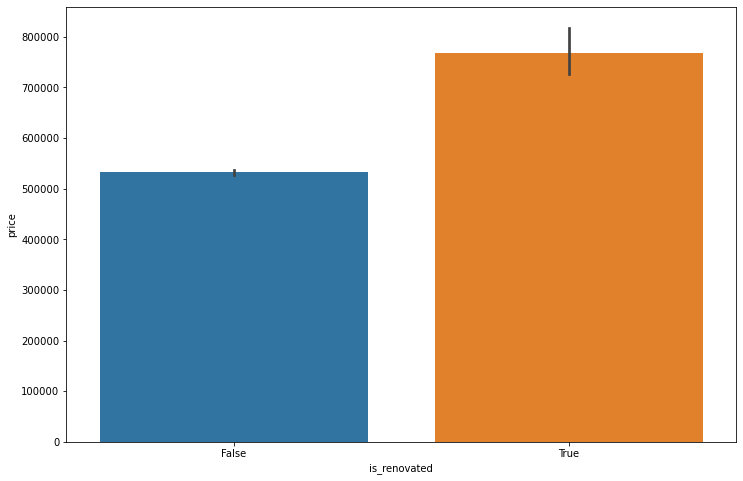

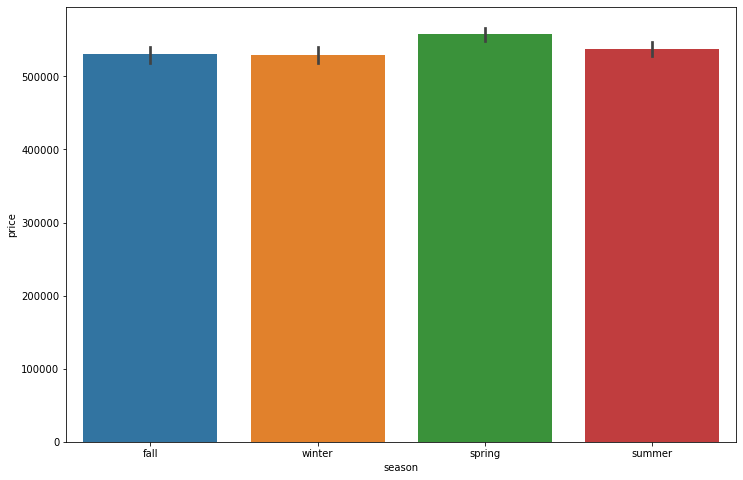

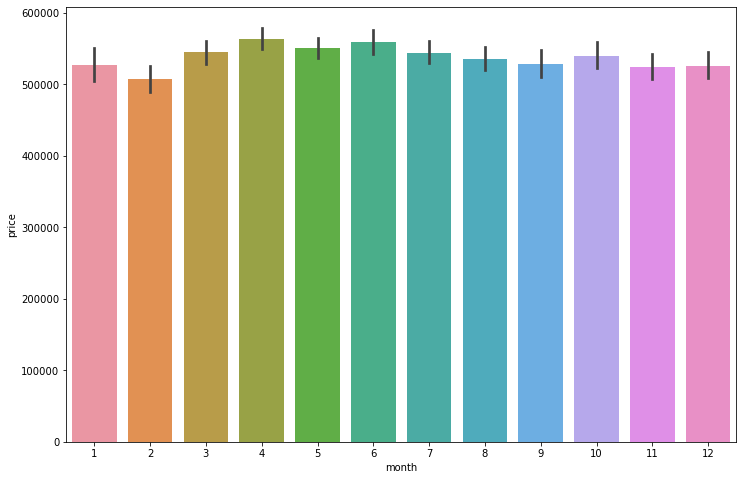

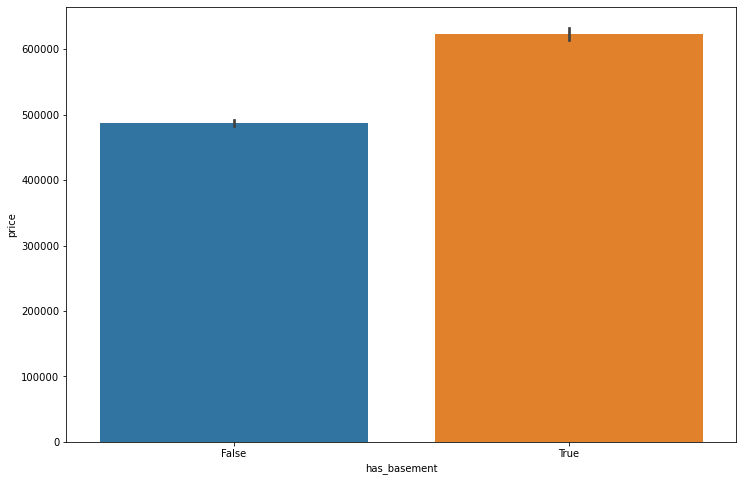

In [19]:
for feature in discrete_features:
    plt.figure(figsize=(12,8))
    sns.barplot(x=feature, y='price', data=data1)
    

In [20]:
continuous_feature = [feature for feature in data1.columns if feature not in discrete_features+['price']+['date']]
continuous_feature

['sqft_living',
 'sqft_lot',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

/Users/meaghanross/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/meaghanross/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/meaghanross/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to

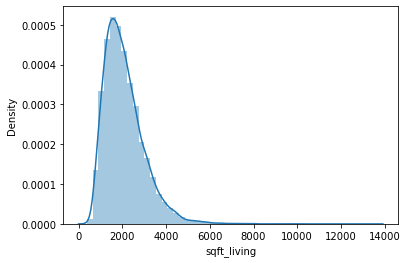

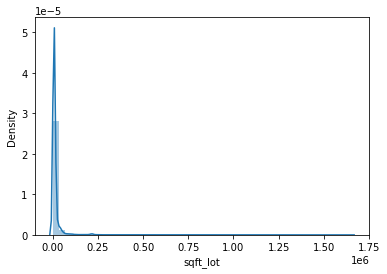

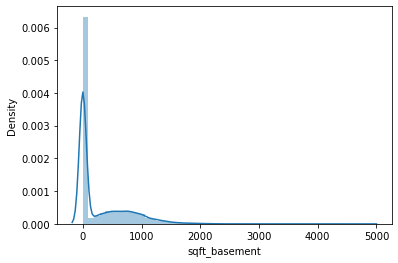

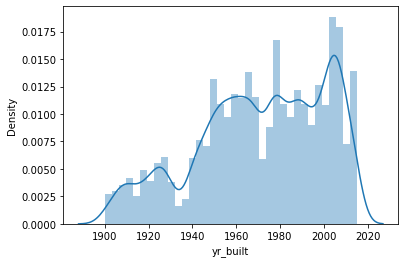

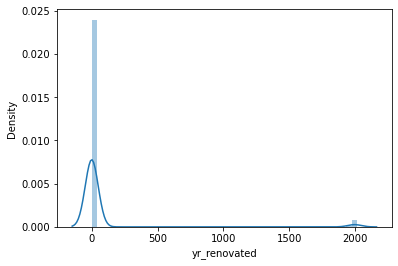

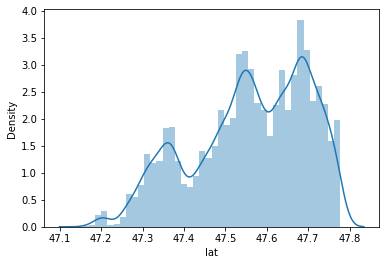

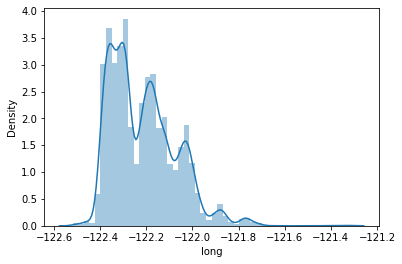

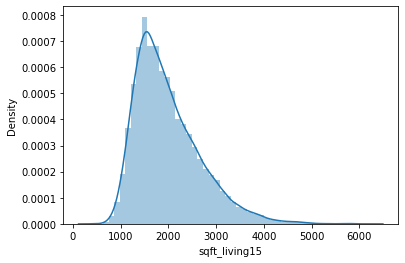

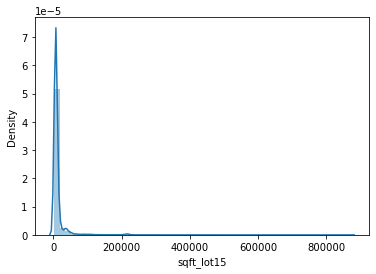

In [21]:
for feature in continuous_feature:
    plt.figure()
    sns.distplot(data1[feature])

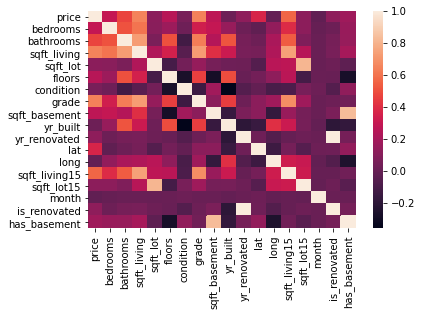

In [43]:
data1.corr()
sns.heatmap(data1.corr());

Dealing with Outliers

In [23]:
def lower_limit(col):
    lower_limit = np.mean(col)-3*np.std(col)
    return lower_limit

In [24]:
def upper_limit(col):
    upper_limit = np.mean(col)+3*np.std(col)
    return upper_limit

In [25]:
def between_range(col):
    bool_col = col.between(lower_limit(col),upper_limit(col))
    return bool_col

In [26]:
data1 = data1[(data1['sqft_living'] >= lower_limit(data1['sqft_living'])) & (data1['sqft_living'] <= upper_limit(data1['sqft_living']))]

In [27]:
data1 = data1[(data1['sqft_lot'] >= lower_limit(data1['sqft_lot'])) & (data1['sqft_lot'] <= upper_limit(data1['sqft_lot']))]

In [28]:
data1 = data1[(data1['sqft_living15'] >= lower_limit(data1['sqft_living15'])) & (data1['sqft_living15'] <= upper_limit(data1['sqft_living15']))]

In [29]:
data1 = data1[(data1['sqft_lot15'] >= lower_limit(data1['sqft_lot15'])) & (data1['sqft_lot15'] <= upper_limit(data1['sqft_lot15']))]

In [30]:
data1.shape

(20132, 20)

/Users/meaghanross/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/meaghanross/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/meaghanross/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to

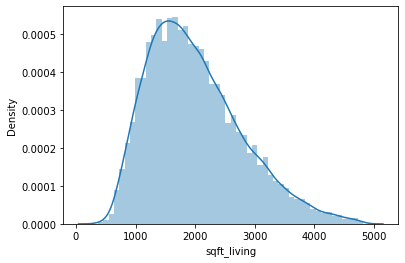

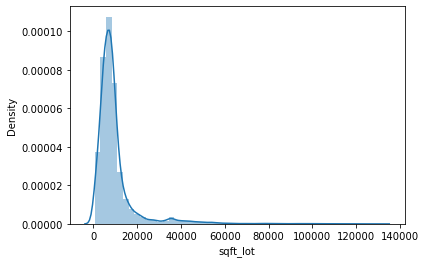

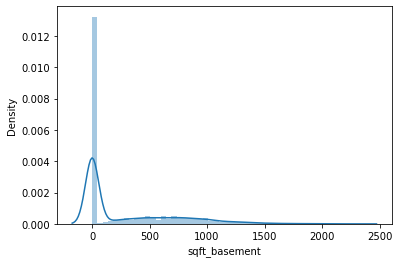

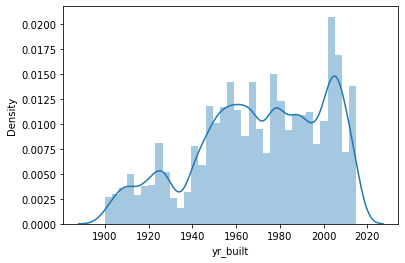

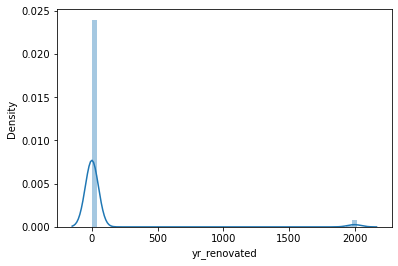

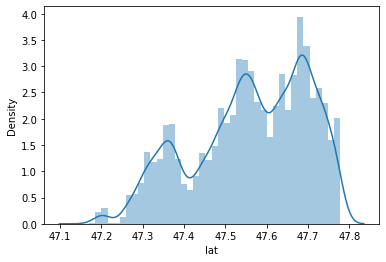

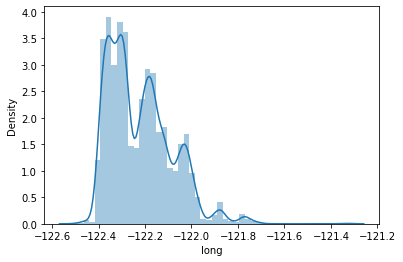

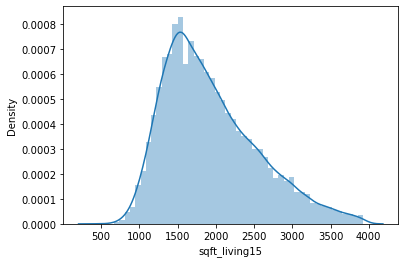

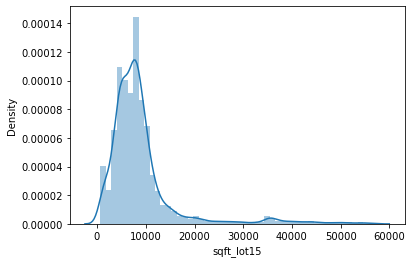

In [31]:
for feature in continuous_feature:
    plt.figure()
    sns.distplot(data1[feature])

In [32]:
data1['bedrooms'].max()

33

In [33]:
data1 = data1[(data1['bedrooms']!=33)]

In [50]:
data1['bathrooms']=round(data1['bathrooms']*2)/2

In [51]:
data1['bathrooms'].value_counts()

2.0    6683
2.5    5065
1.0    3771
3.0    2284
1.5    1396
3.5     602
4.0     250
4.5      58
5.0      16
0.5       3
6.0       2
7.5       1
Name: bathrooms, dtype: int64

In [52]:
data1['bedrooms'].max()

11

In [53]:
data1.drop(labels = ['yr_renovated','sqft_basement','sqft_living15','sqft_lot15'], axis=1, inplace=True)

KeyError: "['yr_renovated' 'sqft_basement' 'sqft_living15' 'sqft_lot15'] not found in axis"

In [54]:
price_corrs = data1.corr()["price"].map(abs).sort_values(ascending=False)
price_corrs

price           1.000000
sqft_living     0.646800
grade           0.643538
bathrooms       0.460189
lat             0.363181
bedrooms        0.294626
floors          0.252868
has_basement    0.180632
is_renovated    0.126962
sqft_lot        0.114814
condition       0.057957
yr_built        0.022790
month           0.015933
long            0.003159
Name: price, dtype: float64

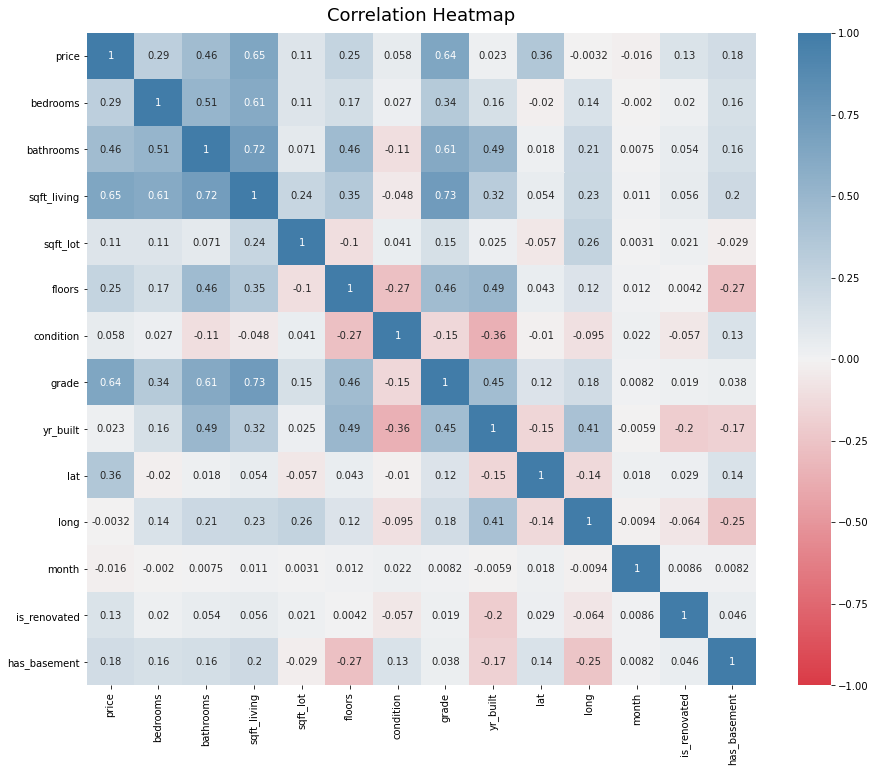

In [55]:
cmap = sns.diverging_palette(10, 240, as_cmap=True)
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(data1.corr(), vmin=-1, vmax=1, annot=True, cmap=cmap)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [37]:
y = data['price']
X = data.drop(['price'], axis=1)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


[Text(0.5, 0, 'Longitude'),
 Text(0, 0.5, 'Latitude'),
 Text(0.5, 1.0, 'Price by Location')]

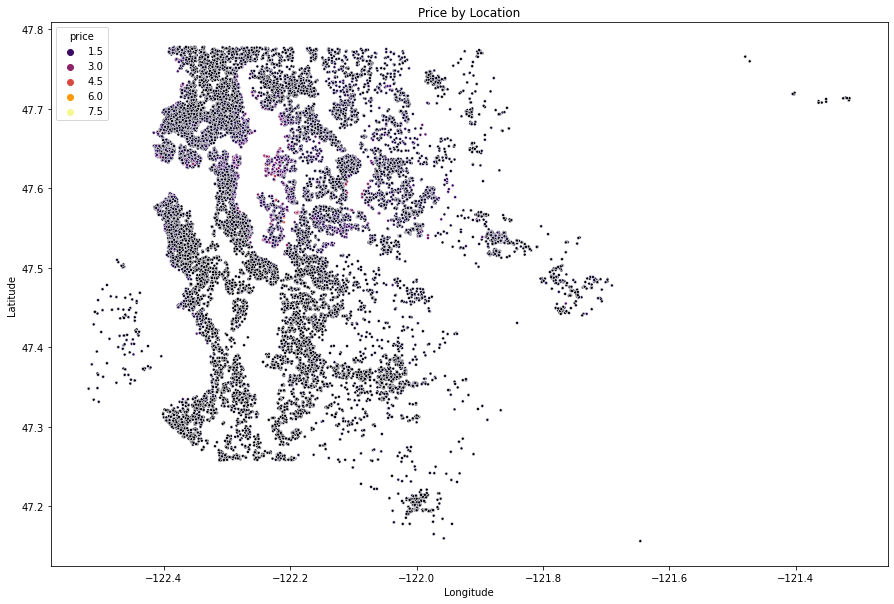

In [40]:
fig = plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=X_train["long"], y=X_train["lat"], hue=y_train, palette="inferno",
                     marker=".")
ax.set( xlabel="Longitude",
        ylabel="Latitude", 
        title="Price by Location")